## Nuclei segmentation

#### Preparations

To test different segmentation algorithms, we need access to a test image. When you execute the cell below, a github repository will be cloned and test images will be available in your session. 

You can see available files by clicking the folder icon in the left side menu. 

Alternatively you can upload files directly from your drive to the session sotrage by using the upload button (in the Files tab).

In [30]:
!git clone https://github.com/fjorka/Pitt_SBII_2023.git

Cloning into 'Pitt_SBII_2023'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 27.06 MiB | 8.80 MiB/s, done.


The cell below installs and imports necessary libraries which make available the functions to open, visualize and segment images.

In [1]:
!pip install cellpose
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd
import numpy as np
from tifffile import imread, imsave
import matplotlib.pyplot as plt
from cellpose import models
from skimage.measure import regionprops_table

#### Open and display test image

In [7]:
# define pathway to the image
im_path = './Pitt_SBII_2023/2187T-5_2.0.4_P0007_Z00_DAPI.tif'

# load in image to a variable 'im'
im = imread(im_path)

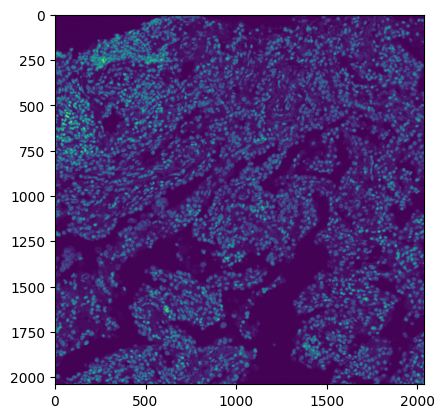

In [8]:
# display the test image
plt.imshow(im)

#### Segmentation

Before testing different segmentation algorithms, let's create a small sample image.

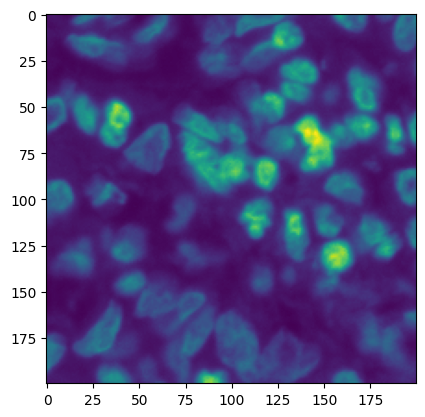

In [9]:
# cut the sample image
im_small = im[1000:1200,1000:1200]

# display the test image
plt.imshow(im_small)

Cellpose library provides following pre-trained models:

'cyto', 'nuclei', 'tissuenet', 'livecell', 'cyto2', 'CP', 'CPx', 'TN1', 'TN2', 'TN3', 'LC1', 'LC2', 'LC3', 'LC4'

Let's test 'nuclei' model first:

In [10]:
# define the model (if used the first time in the session the model will be imported)
model = models.CellposeModel(gpu=False, model_type='nuclei')

# perform segmentation and store the result in the 'mask' image
mask,_,_ = model.eval(im_small)

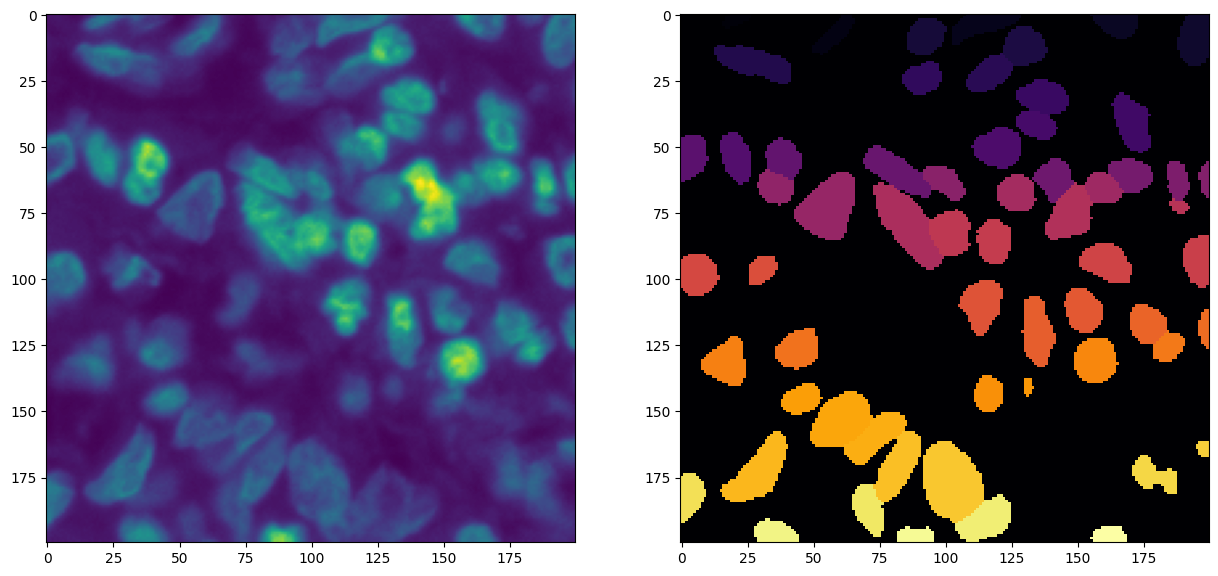

In [11]:
# visualize the results

fig,axes = plt.subplots(1,2,figsize=(15,10))

# display the original sample image
axes[0].imshow(im_small)

# display segmentation mask (each objects is displayed in different color)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

Now, let's try a 'TN1' model. 

Please note that this time we define the expected size of the objects by specifying the 'diameter' parameter. You can specify it for any of the cellpose models. 

Also, in this quick test we are not changing the names of the variables. After executing the cell above we will change both the model and the resulting mask - remember that the order of executing cells matter.

In [22]:
# define the model (if it is used for the first time in the session the model will be imported)
model = models.CellposeModel(gpu=False, model_type='TN1')

# perform segmentation and store the result in the 'mask' image
mask,_,_ = model.eval(im_small,diameter = 10)

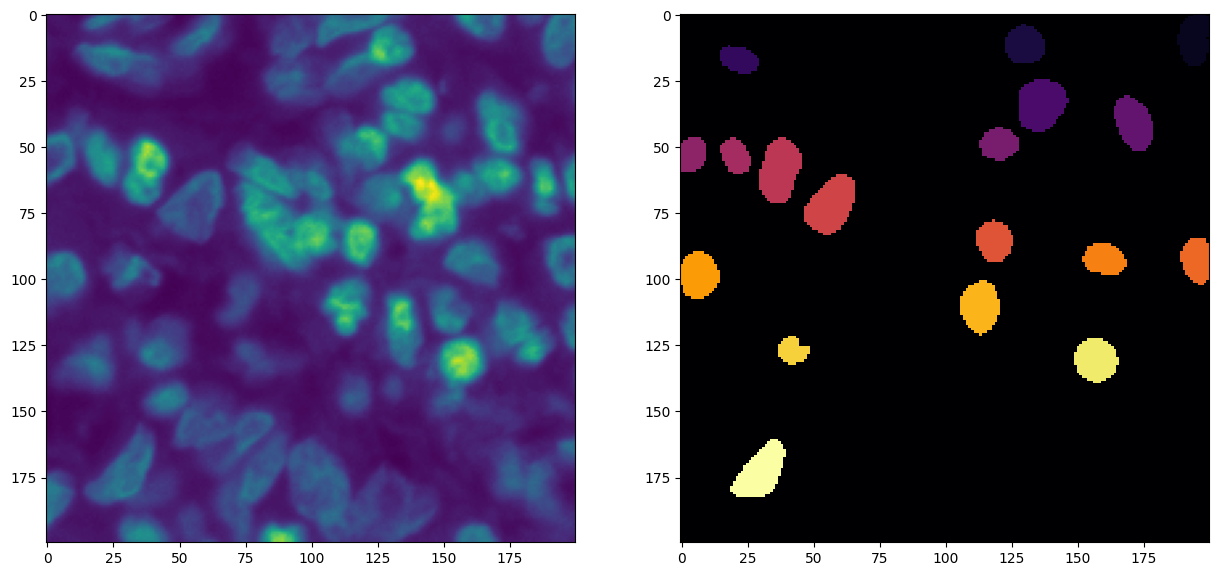

In [23]:
# visualize the results

fig,axes = plt.subplots(1,2,figsize=(15,10))

# display the original sample image
axes[0].imshow(im_small)

# display segmentation mask (each objects is displayed in different color)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

Test a few other models to find the best segmentation.

In [ ]:
# define the model (if it is used for the first time in the session the model will be imported)
model = models.CellposeModel(gpu=False, model_type= )

# perform segmentation and store the result in the 'mask' image
mask,_,_ = model.eval(im_small,diameter = 10)

In [ ]:
# visualize the results

fig,axes = plt.subplots(1,2,figsize=(15,10))

# display the original sample image
axes[0].imshow(im_small)

# display segmentation mask (each objects is displayed in different color)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

Once you identified the best segmentation algorithm, let's segment the whole image (it should run around 3 min):

In [25]:
# define the model (if it is used for the first time in the session the model will be imported)
model = models.CellposeModel(gpu=True, model_type= 'cyto')

# perform segmentation and store the result in the 'mask' image
mask,_,_ = model.eval(im,diameter = 25)

100%|██████████| 25.3M/25.3M [00:00<00:00, 28.4MB/s]


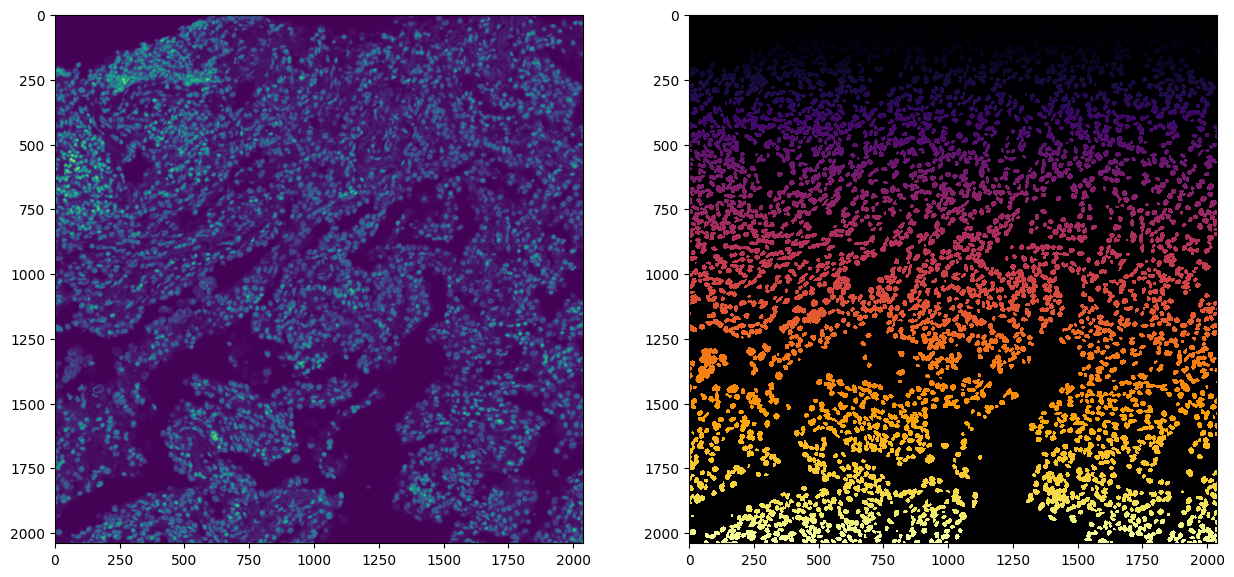

In [27]:
# visualize the results

fig,axes = plt.subplots(1,2,figsize=(15,10))

# display the original sample image
axes[0].imshow(im)

# display segmentation mask (each objects is displayed in different color)
axes[1].imshow(mask,cmap='inferno',interpolation='nearest')

#### Calculate properties of cells

Once a mask is defined, calculating signals of individual objects is a straightforward task.

In [39]:
# read in and visualize different channels

im_cy3_path = im_path = './Pitt_SBII_2023/2187T-5_2.0.4_P0007_Z00_Cy3.tif'
im_cy3 = imread(im_cy3_path)

im_cy5_path = im_path = './Pitt_SBII_2023/2187T-5_2.0.4_P0007_Z00_Cy5.tif'
im_cy5 = imread(im_cy5_path)

im_fitc_path = im_path = './Pitt_SBII_2023/2187T-5_2.0.4_P0007_Z00_FITC.tif'
im_fitc = imread(im_fitc_path)

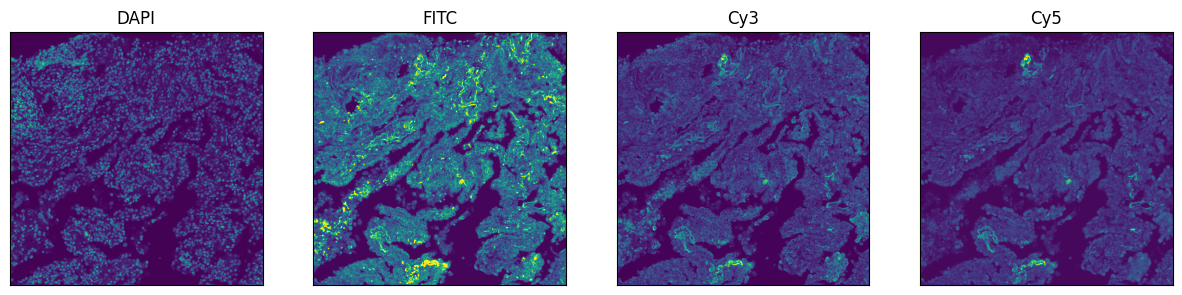

In [49]:
# visualize all the channels

fig,axes = plt.subplots(1,4,figsize=(15,10))

# display the original sample image
axes[0].imshow(im)
axes[0].set_title('DAPI')

axes[1].imshow(im_fitc,vmax=10000)
axes[1].set_title('FITC')

axes[2].imshow(im_cy3,vmax=10000)
axes[2].set_title('Cy3')

axes[3].imshow(im_cy5,vmax=4000)
axes[3].set_title('Cy5')

# remove ticks from the display
for ax in axes:

    ax.set_xticks([])
    ax.set_yticks([])

In [53]:
# define which properties of cells to calculate 
# see documentation here: https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

selected_properties = ['label','centroid','area','mean_intensity']

# put all the intensity channels together to create a nice package
all_channels = np.stack([im,im_fitc,im_cy3,im_cy5],axis=2)

# calculate properties of cells
my_data = regionprops_table(mask, intensity_image = all_channels, properties = selected_properties)

# put results in a nice table
my_data = pd.DataFrame(my_data)

In [54]:
my_data

,label,centroid-0,centroid-1,area,mean_intensity-0,mean_intensity-1,mean_intensity-2,mean_intensity-3
0,1,4.506550,701.205240,229,6311.978166,3144.117904,1953.668122,464.606987
1,2,3.171875,1344.039062,128,3694.812500,5307.023438,3292.109375,653.500000
2,3,5.351515,1372.042424,165,2559.672727,3674.248485,4660.812121,631.533333
3,4,2.015152,1418.378788,66,2418.969697,646.469697,985.045455,430.833333
4,5,5.899083,1848.247706,218,3282.839450,1734.252294,835.178899,262.500000
...,...,...,...,...,...,...,...,...
4137,4138,2035.506173,1930.074074,162,5154.209877,3137.117284,1517.487654,765.555556
4138,4139,2036.413793,1882.183908,87,3215.126437,2298.080460,1648.597701,635.804598
4139,4140,2036.430108,111.129032,93,4813.870968,2527.537634,2121.935484,443.580645
4140,4141,2036.529412,828.627451,51,4727.941176,3616.803922,1906.372549,535.019608
